#Sprint 1


##Import Necessory Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
#Dataset Reading
dataset=pd.read_csv('cardio_train.csv',sep=';')
dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1




*   Dataset Contain 12 attributes + target variable
*  70000 details of patients



After remove the ID column the the dataset contain 12 features

In [ ]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#Dataset Shape
dataset.shape

(70000, 13)

70000 rows, 13 columns

In [ ]:
#Dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Dataset contain 12 integers and 1 decimal values( Weight)

In [ ]:
dataset.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
#Dataset Description
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Age feature contain numerical value in Days

In [ ]:
dataset.isna()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Check null values
dataset.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

The dataset does not contain any null values.

In [ ]:
#Check Duplicate Values
dataset.duplicated().sum()

0

The dataset does not contains any duplicate values.

In [ ]:
#convert ages from days to years
dataset["age"]=(dataset["age"]/365).values.astype(int)
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

##Dataset visualization

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>,
        <Axes: title={'center': 'cholesterol'}>],
       [<Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>,
        <Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>],
       [<Axes: title={'center': 'cardio'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

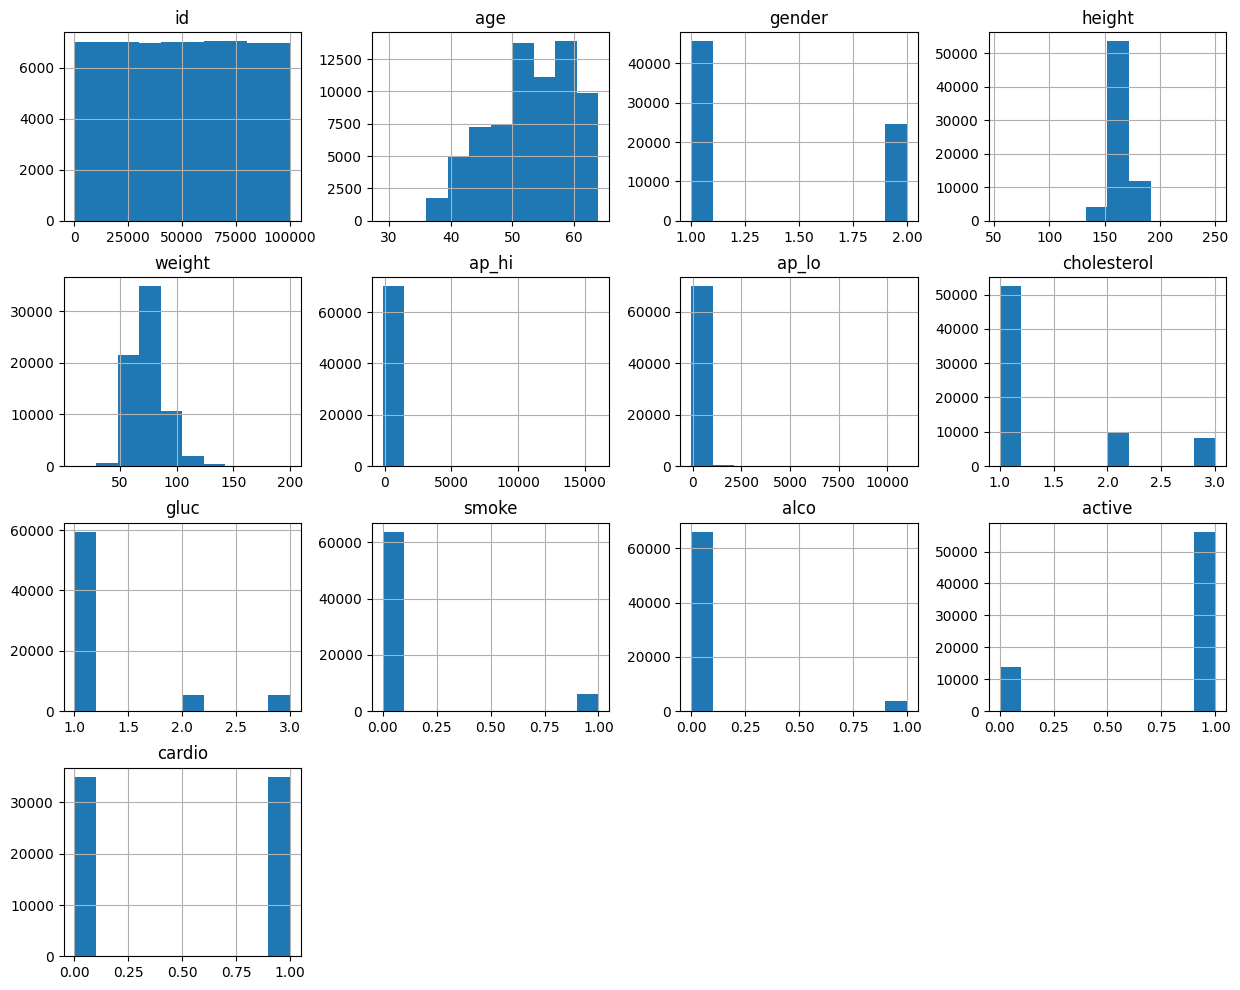

In [ ]:
dataset.hist(figsize=(15,12))

In [ ]:
dataset['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

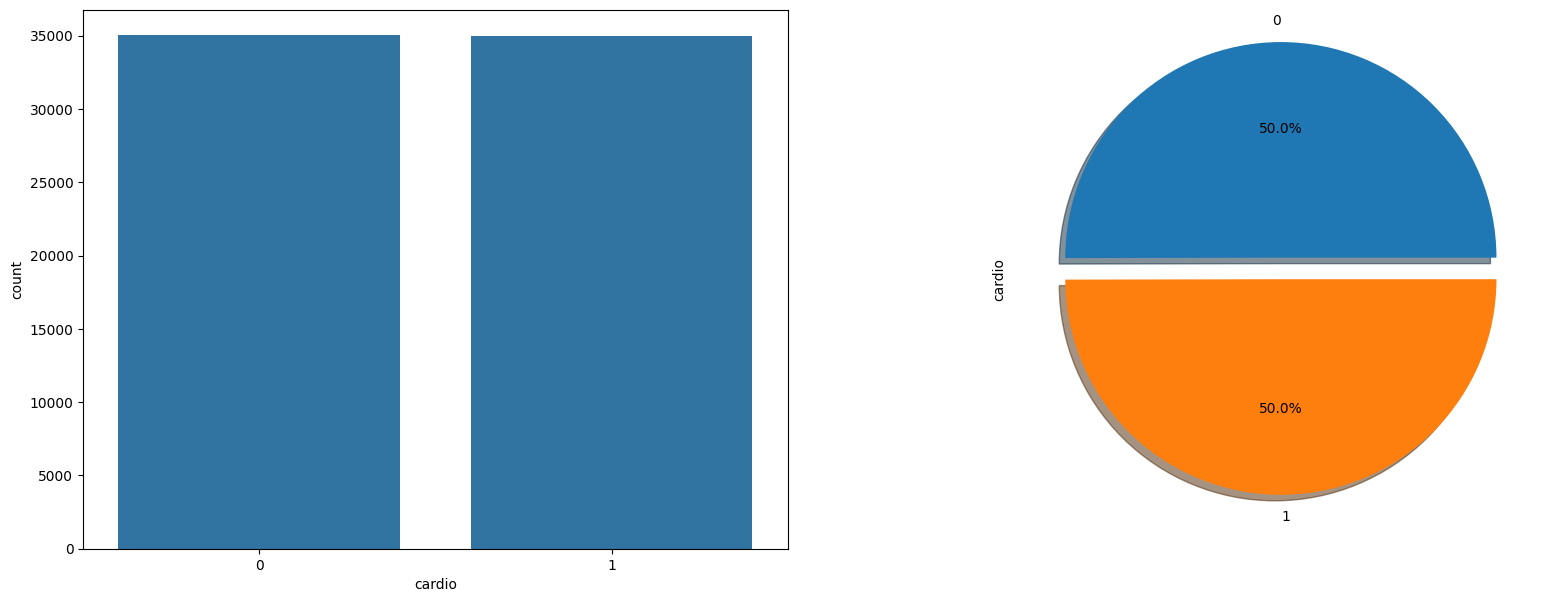

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=dataset, x="cardio", ax=ax[0])
dataset["cardio"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["0", "1"], shadow=True, ax=ax[1])

plt.show()

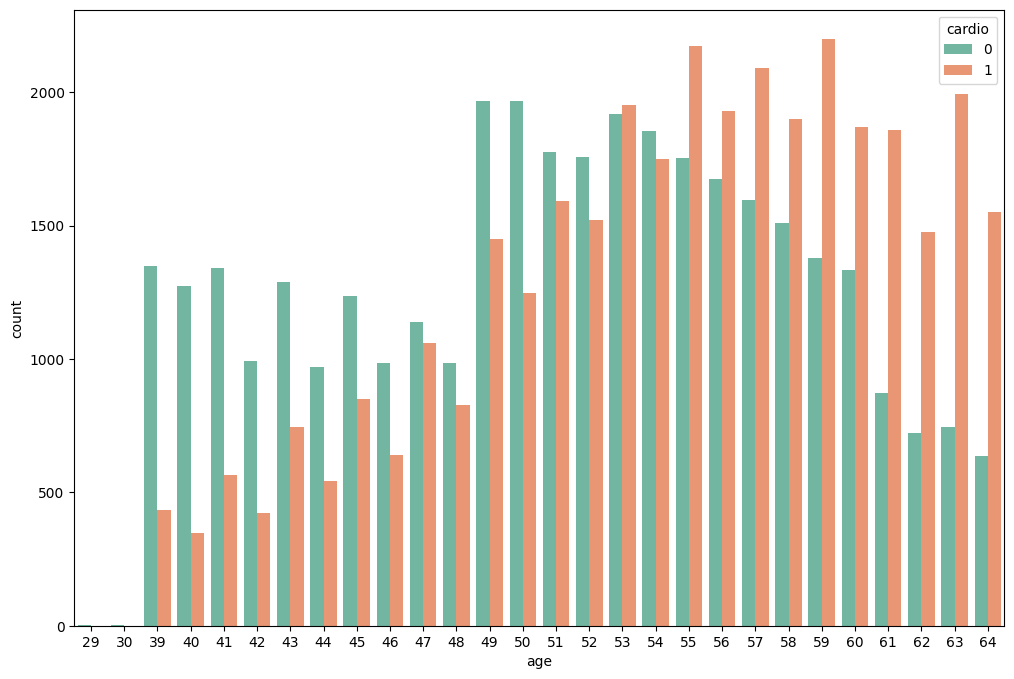

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 8
sns.countplot(x='age', hue='cardio', data = dataset, palette="Set2");

We can see that around 55 age over the people have CVD disease

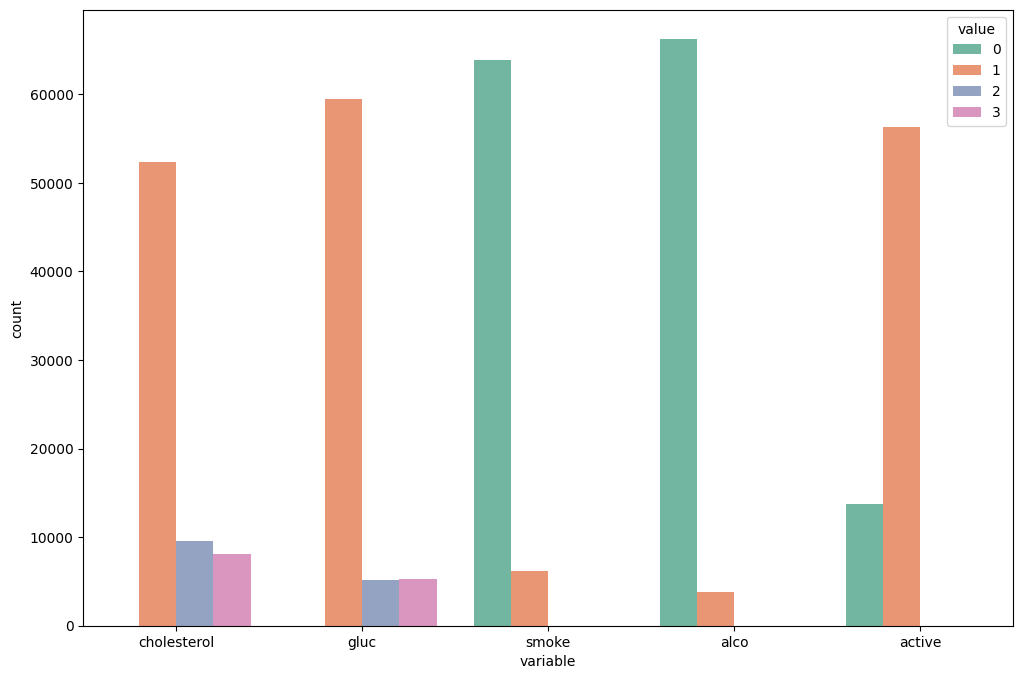

In [ ]:
df_categorical = dataset.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value", data=pd.melt(df_categorical), palette="Set2");

Cholestrol
1.   Normal - 52385 patients
2.   Above normal - 9549 patients
3.   Well above normal - 8066 patients

Glucose level
1.   Normal - 59479
2.   Above normal - 5331
3.   Well above normal - 5190

Smoke
1.   Yes - 6169
2.   No - 63831

Alcoholic
1.   Yes - 3764
2.   No - 66236

Physicaly active

1.   Yes - 56261
2.   No - 13739



















In [ ]:
cholesterol_counts = dataset['cholesterol'].value_counts()

# Display the counts
print("Counts for 'cholesterol' column:")
print(cholesterol_counts)

glucose_counts = dataset['gluc'].value_counts()

# Display the counts
print("Counts for 'gluc' column:")
print(glucose_counts)

smoke_counts = dataset['smoke'].value_counts()

# Display the counts
print("Counts for 'smoke' column:")
print(smoke_counts)

alco_counts = dataset['alco'].value_counts()

# Display the counts
print("Counts for 'alco' column:")
print(alco_counts)

active_counts = dataset['active'].value_counts()

# Display the counts
print("Counts for 'active' column:")
print(active_counts)

Counts for 'cholesterol' column:
1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64
Counts for 'gluc' column:
1    59479
3     5331
2     5190
Name: gluc, dtype: int64
Counts for 'smoke' column:
0    63831
1     6169
Name: smoke, dtype: int64
Counts for 'alco' column:
0    66236
1     3764
Name: alco, dtype: int64
Counts for 'active' column:
1    56261
0    13739
Name: active, dtype: int64


In [ ]:
dataset['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

The dataset contain 45530 womens and 24470 mens.

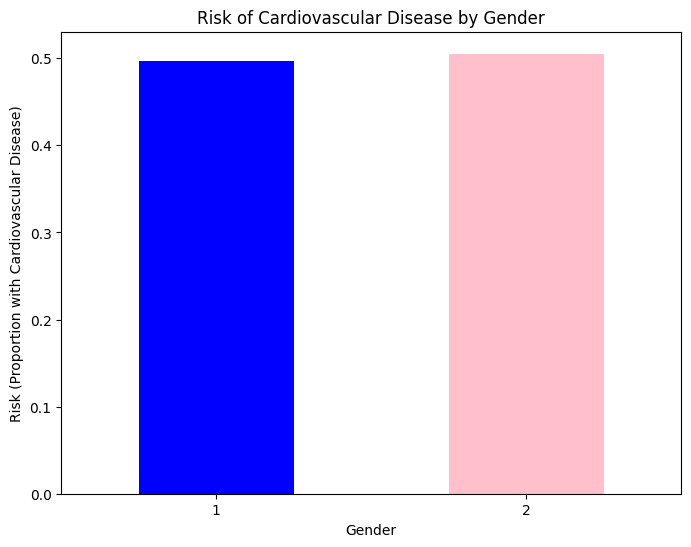

In [ ]:

plt.figure(figsize=(8, 6))
dataset.groupby('gender')['cardio'].mean().plot(kind='bar', color=['blue', 'pink'])
plt.title('Risk of Cardiovascular Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Risk (Proportion with Cardiovascular Disease)')
plt.xticks(rotation=0)
plt.show()


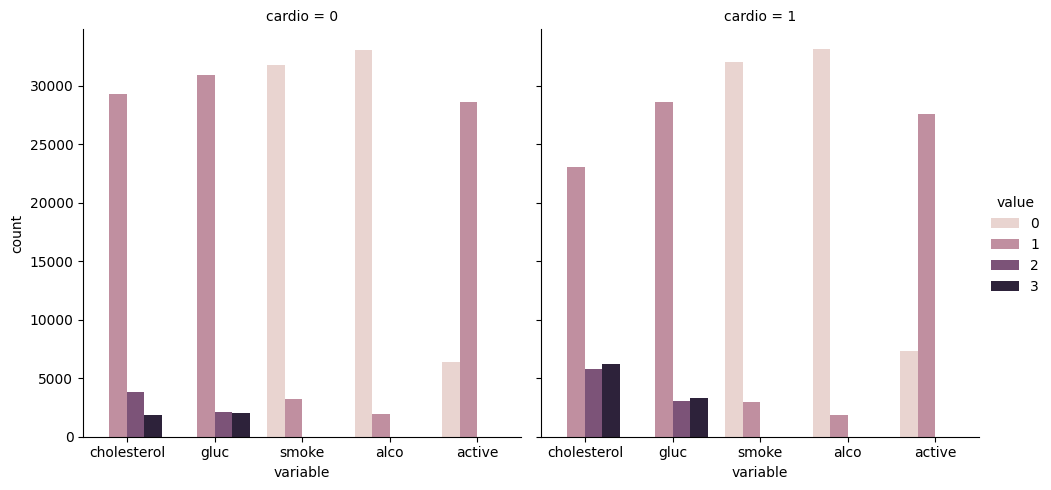

In [ ]:
df_long = pd.melt(dataset, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");



1.   We can see that patients with CVD have high cholestrol and blood glucose level.
2.   Comparatively, they less active.



<Axes: >

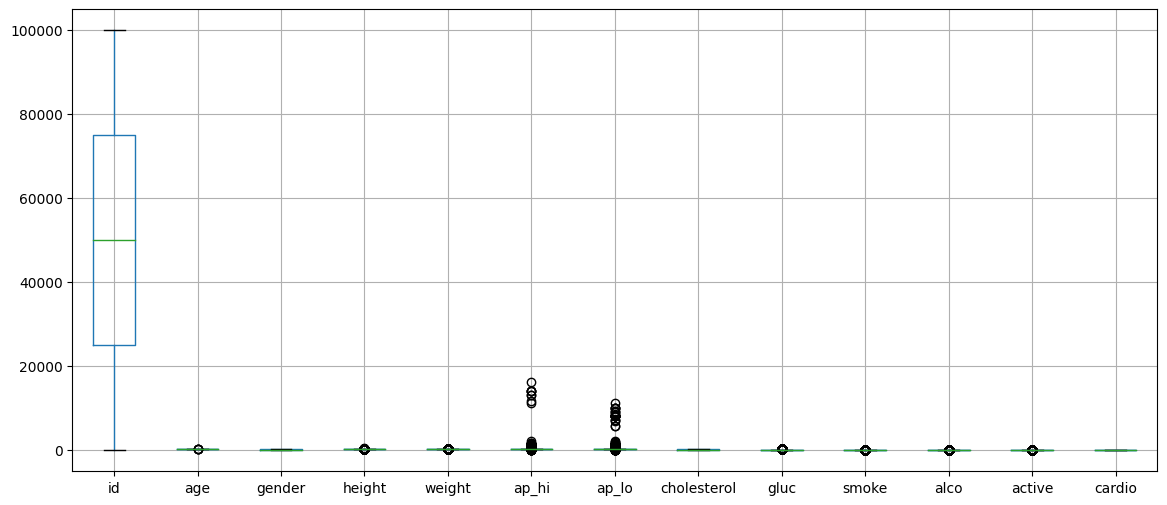

In [ ]:
dataset.boxplot(figsize=(14,6))

<Axes: >

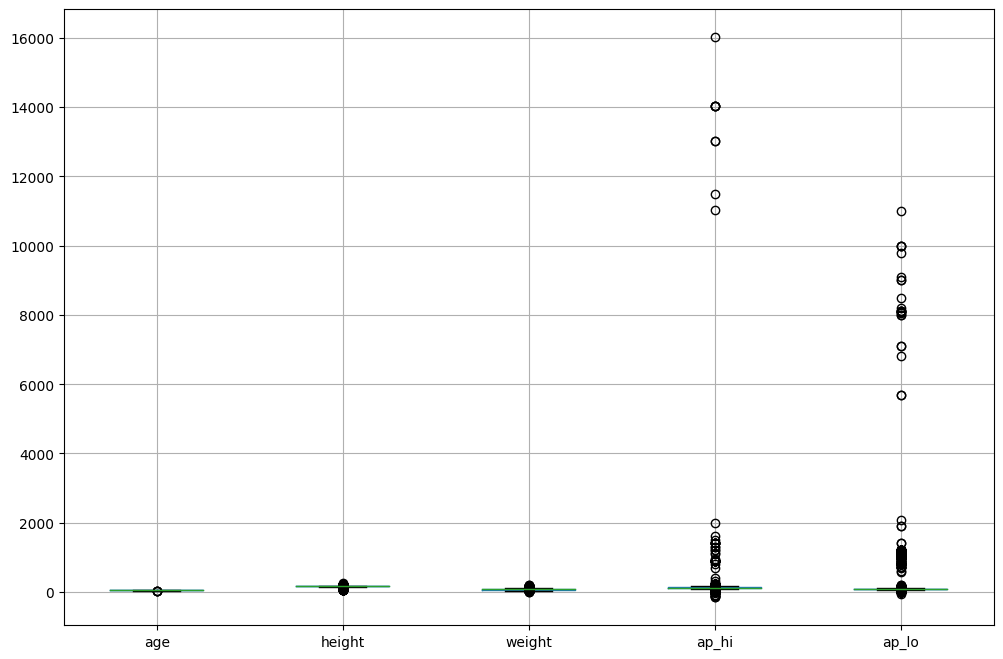

In [ ]:
dataset[["age","height","weight","ap_hi","ap_lo"]].boxplot()

We can see that ap_hi(Systolic Blood pressure) and ap_hi(Diastolic Blood pressure) have outliers.

##Dataset preprocessing

In [ ]:
#Remove Id
dataset.drop("id",axis=1,inplace=True)
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with columns 'ap_hi' and 'ap_lo'

# Calculate the IQR for ap_hi and ap_lo
Q1_hi = dataset['ap_hi'].quantile(0.25)
Q3_hi = dataset['ap_hi'].quantile(0.75)
IQR_hi = Q3_hi - Q1_hi

Q1_lo = dataset['ap_lo'].quantile(0.25)
Q3_lo = dataset['ap_lo'].quantile(0.75)
IQR_lo = Q3_lo - Q1_lo

# Define the upper and lower bounds for outliers
upper_bound_hi = Q3_hi + 1.5 * IQR_hi
lower_bound_hi = Q1_hi - 1.5 * IQR_hi

upper_bound_lo = Q3_lo + 1.5 * IQR_lo
lower_bound_lo = Q1_lo - 1.5 * IQR_lo

# Identify and filter out outliers
outliers_hi = (dataset['ap_hi'] > upper_bound_hi) | (dataset['ap_hi'] < lower_bound_hi)
outliers_lo = (dataset['ap_lo'] > upper_bound_lo) | (dataset['ap_lo'] < lower_bound_lo)

# Replace outliers with the median (you can choose a different strategy based on your analysis)
dataset.loc[outliers_hi, 'ap_hi'] = dataset['ap_hi'].median()
dataset.loc[outliers_lo, 'ap_lo'] = dataset['ap_lo'].median()


<Axes: >

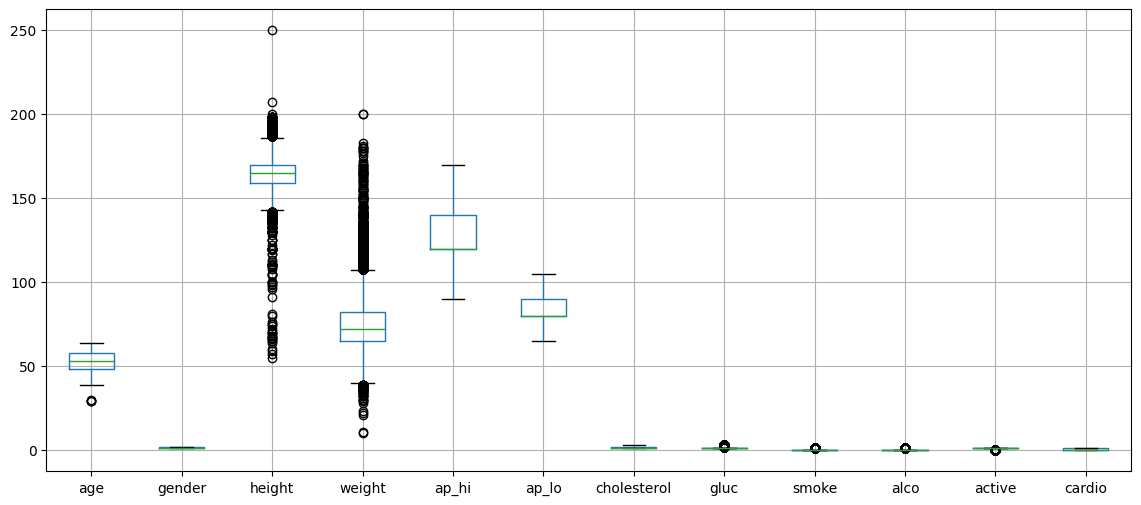

In [ ]:
dataset.boxplot(figsize=(14,6))

In [ ]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,126.054186,81.800643,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,15.263980,7.579819,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Calculate the IQR for age, height, and weight
Q1_age = dataset['age'].quantile(0.25)
Q3_age = dataset['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

Q1_height = dataset['height'].quantile(0.25)
Q3_height = dataset['height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

Q1_weight = dataset['weight'].quantile(0.25)
Q3_weight = dataset['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

# Define the upper and lower bounds for outliers
upper_bound_age = Q3_age + 1.5 * IQR_age
lower_bound_age = Q1_age - 1.5 * IQR_age

upper_bound_height = Q3_height + 1.5 * IQR_height
lower_bound_height = Q1_height - 1.5 * IQR_height

upper_bound_weight = Q3_weight + 1.5 * IQR_weight
lower_bound_weight = Q1_weight - 1.5 * IQR_weight

# Identify and filter out outliers for age, height, and weight
outliers_age = (dataset['age'] > upper_bound_age) | (dataset['age'] < lower_bound_age)
outliers_height = (dataset['height'] > upper_bound_height) | (dataset['height'] < lower_bound_height)
outliers_weight = (dataset['weight'] > upper_bound_weight) | (dataset['weight'] < lower_bound_weight)

# Replace outliers with the median (you can choose a different strategy based on your analysis)
dataset.loc[outliers_age, 'age'] = dataset['age'].median()
dataset.loc[outliers_height, 'height'] = dataset['height'].median()
dataset.loc[outliers_weight, 'weight'] = dataset['weight'].median()


In [ ]:
# Calculate the IQR for gluc, smoke, alco, and active
Q1_gluc = dataset['gluc'].quantile(0.25)
Q3_gluc = dataset['gluc'].quantile(0.75)
IQR_gluc = Q3_gluc - Q1_gluc

Q1_smoke = dataset['smoke'].quantile(0.25)
Q3_smoke = dataset['smoke'].quantile(0.75)
IQR_smoke = Q3_smoke - Q1_smoke

Q1_alco = dataset['alco'].quantile(0.25)
Q3_alco = dataset['alco'].quantile(0.75)
IQR_alco = Q3_alco - Q1_alco

Q1_active = dataset['active'].quantile(0.25)
Q3_active = dataset['active'].quantile(0.75)
IQR_active = Q3_active - Q1_active

# Define the upper and lower bounds for outliers
upper_bound_gluc = Q3_gluc + 1.5 * IQR_gluc
lower_bound_gluc = Q1_gluc - 1.5 * IQR_gluc

upper_bound_smoke = Q3_smoke + 1.5 * IQR_smoke
lower_bound_smoke = Q1_smoke - 1.5 * IQR_smoke

upper_bound_alco = Q3_alco + 1.5 * IQR_alco
lower_bound_alco = Q1_alco - 1.5 * IQR_alco

upper_bound_active = Q3_active + 1.5 * IQR_active
lower_bound_active = Q1_active - 1.5 * IQR_active

# Identify and filter out outliers for gluc, smoke, alco, and active
outliers_gluc = (dataset['gluc'] > upper_bound_gluc) | (dataset['gluc'] < lower_bound_gluc)
outliers_smoke = (dataset['smoke'] > upper_bound_smoke) | (dataset['smoke'] < lower_bound_smoke)
outliers_alco = (dataset['alco'] > upper_bound_alco) | (dataset['alco'] < lower_bound_alco)
outliers_active = (dataset['active'] > upper_bound_active) | (dataset['active'] < lower_bound_active)

# Replace outliers with the median (you can choose a different strategy based on your analysis)
dataset.loc[outliers_gluc, 'gluc'] = dataset['gluc'].median()
dataset.loc[outliers_smoke, 'smoke'] = dataset['smoke'].median()
dataset.loc[outliers_alco, 'alco'] = dataset['alco'].median()
dataset.loc[outliers_active, 'active'] = dataset['active'].median()


In [ ]:
# Calculate the IQR for weight and bmi
Q1_weight = dataset['weight'].quantile(0.25)
Q3_weight = dataset['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight


# Define the upper and lower bounds for outliers
upper_bound_weight = Q3_weight + 1.5 * IQR_weight
lower_bound_weight = Q1_weight - 1.5 * IQR_weight


# Identify and filter out outliers for weight and bmi
outliers_weight = (dataset['weight'] > upper_bound_weight) | (dataset['weight'] < lower_bound_weight)


# Replace outliers with the median (you can choose a different strategy based on your analysis)
dataset.loc[outliers_weight, 'weight'] = dataset['weight'].median()



<Axes: >

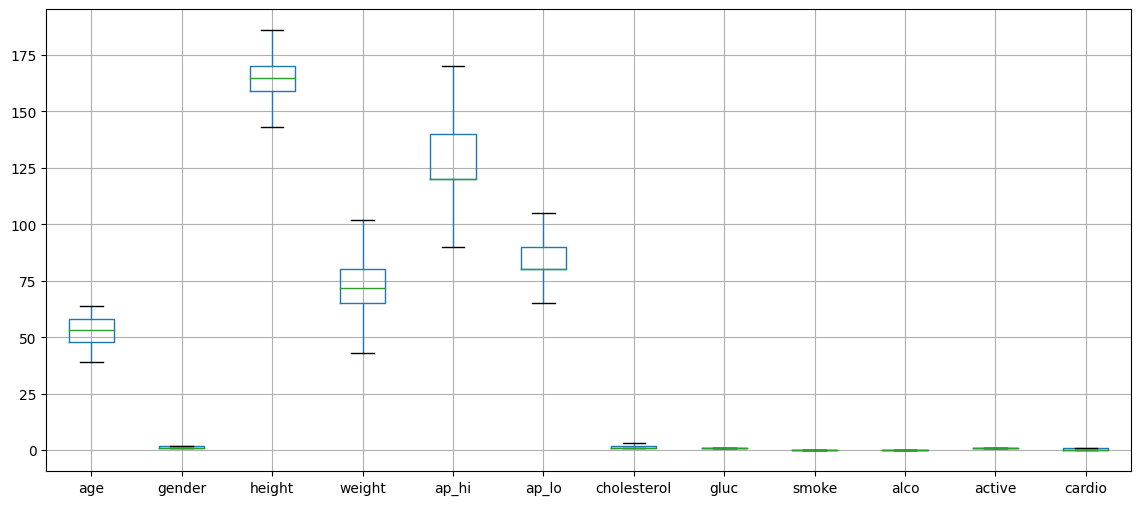

In [ ]:
dataset.boxplot(figsize=(14,6))

In [ ]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,52.842029,1.349571,164.404914,72.622391,126.054186,81.800643,1.366871,1.0,0.0,0.0,1.0,0.499700
std,6.764423,0.476838,7.593082,11.560462,15.263980,7.579819,0.680250,0.0,0.0,0.0,0.0,0.500003
min,39.000000,1.000000,143.000000,43.000000,90.000000,65.000000,1.000000,1.0,0.0,0.0,1.0,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.0,0.0,0.0,1.0,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.0,0.0,0.0,1.0,0.000000
75%,58.000000,2.000000,170.000000,80.000000,140.000000,90.000000,2.000000,1.0,0.0,0.0,1.0,1.000000
max,64.000000,2.000000,186.000000,102.000000,170.000000,105.000000,3.000000,1.0,0.0,0.0,1.0,1.000000


In [ ]:
dataset["bmi"] = np.round(dataset.weight/(dataset.height/100)**2,2)
print(dataset.shape)
dataset.head(3)

(70000, 13)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,51,1,165,64.0,130,70,3,1,0,0,1,1,23.51


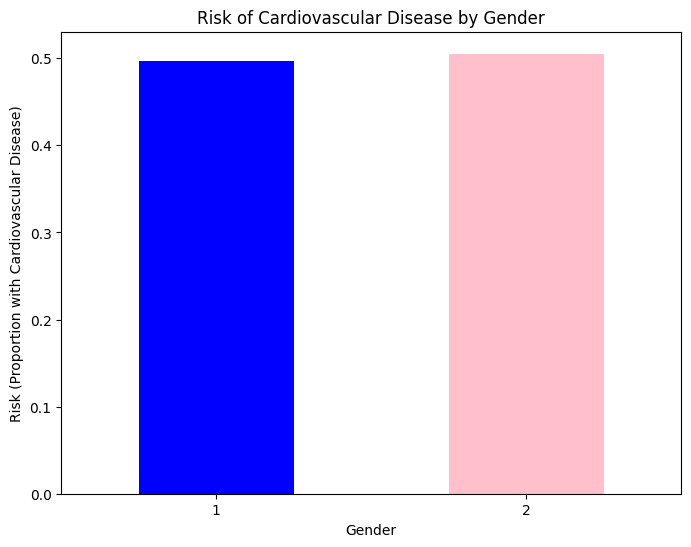

In [ ]:
plt.figure(figsize=(8, 6))
dataset.groupby('gender')['cardio'].mean().plot(kind='bar', color=['blue', 'pink'])
plt.title('Risk of Cardiovascular Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Risk (Proportion with Cardiovascular Disease)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
dataset["gender"].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming 'dataset' is your cardiovascular disease dataset DataFrame
# Separate features (x) and target variable (y)
xx = dataset.drop('gender', axis=1)
yy = dataset['gender']

# Determine the desired number of samples for each class in the 'gender' column
desired_samples = yy.value_counts().max()  # Adjust this as needed

# Define the sampling strategy for RandomOverSampler
sampling_strategy = {1: desired_samples, 2: desired_samples}

# Apply random oversampling to the entire dataset for the 'gender' column
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = ros.fit_resample(xx, yy)

# Combine the resampled data back into a DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=xx.columns), pd.DataFrame(y_resampled, columns=['gender'])], axis=1)

# Display the resampled 'gender' column counts
print(df_resampled['gender'].value_counts())



2    45530
1    45530
Name: gender, dtype: int64


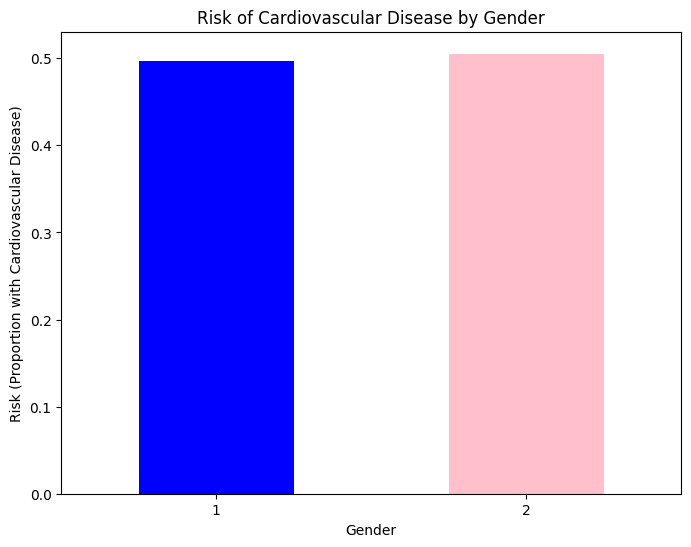

In [ ]:
plt.figure(figsize=(8, 6))
dataset.groupby('gender')['cardio'].mean().plot(kind='bar', color=['blue', 'pink'])
plt.title('Risk of Cardiovascular Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Risk (Proportion with Cardiovascular Disease)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_resampled['cardio'].value_counts()

1    45598
0    45462
Name: cardio, dtype: int64

In [ ]:
df_resampled

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender
0,50,168,62.0,110,80,1,1,0,0,1,0,21.97,2
1,55,156,85.0,140,90,3,1,0,0,1,1,34.93,1
2,51,165,64.0,130,70,3,1,0,0,1,1,23.51,1
3,48,169,82.0,150,100,1,1,0,0,1,1,28.71,2
4,47,156,56.0,100,80,1,1,0,0,1,0,23.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91055,52,170,75.0,120,80,3,1,0,0,1,1,25.95,2
91056,58,168,82.0,115,80,1,1,0,0,1,0,29.05,2
91057,58,178,93.0,140,80,1,1,0,0,1,1,29.35,2
91058,60,170,65.0,110,80,2,1,0,0,1,1,22.49,2


##split the dataset

In [ ]:
x=df_resampled.drop('cardio',axis=1)
y=df_resampled['cardio']
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=42)

In [ ]:
x_train

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,gender
13724,58,157,62.0,120,80,1,1,0,0,1,25.15,1
914,48,164,80.0,140,90,2,1,0,0,1,29.74,1
90135,55,181,79.0,120,80,1,1,0,0,1,24.11,2
53477,52,158,84.0,150,90,1,1,0,0,1,33.65,1
21648,50,161,63.0,110,70,2,1,0,0,1,24.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,63,162,73.0,160,90,1,1,0,0,1,27.82,2
54886,64,169,74.0,120,80,1,1,0,0,1,25.91,1
76820,44,167,85.0,120,80,1,1,0,0,1,30.48,2
860,49,167,70.0,120,80,1,1,0,0,1,25.10,1


In [ ]:
y_train

13724    0
914      1
90135    1
53477    1
21648    0
        ..
6265     1
54886    0
76820    0
860      0
15795    0
Name: cardio, Length: 72848, dtype: int64

##Train the models and calculate the acurracy

##Model - Decision Tree

In [ ]:
#Train decision tree
dcl=DecisionTreeClassifier()
dcl.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
predict=dcl.predict(x_test)
DecisionTree_accuracy=accuracy_score(y_test,predict)
print(f"Accuracy:{DecisionTree_accuracy:.2f}")
print("Decision Tree Classification Report:\n", classification_report(y_test, predict))

Accuracy:0.74
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74      9041
           1       0.75      0.73      0.74      9171

    accuracy                           0.74     18212
   macro avg       0.74      0.74      0.74     18212
weighted avg       0.74      0.74      0.74     18212



In [ ]:
train_predict = dcl.predict(x_train)
dcl_train_accura = accuracy_score(y_train,train_predict)
print(dcl_train_accura)

0.9666977816824072


In [ ]:
cm=confusion_matrix(y_test,predict)
print("Confussion Matrix")
print(cm)

Confussion Matrix
[[6802 2239]
 [2446 6725]]


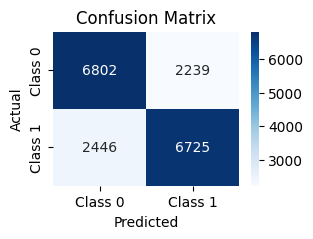

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predict)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
df_resampled

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender
0,50,168,62.0,110,80,1,1,0,0,1,0,21.97,2
1,55,156,85.0,140,90,3,1,0,0,1,1,34.93,1
2,51,165,64.0,130,70,3,1,0,0,1,1,23.51,1
3,48,169,82.0,150,100,1,1,0,0,1,1,28.71,2
4,47,156,56.0,100,80,1,1,0,0,1,0,23.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91055,52,170,75.0,120,80,3,1,0,0,1,1,25.95,2
91056,58,168,82.0,115,80,1,1,0,0,1,0,29.05,2
91057,58,178,93.0,140,80,1,1,0,0,1,1,29.35,2
91058,60,170,65.0,110,80,2,1,0,0,1,1,22.49,2


In [ ]:
import pickle

# Assuming dt_scratch is your trained decision tree model

# Save the model to a file
with open('decision_tree.pkl_2', 'wb') as file:
    pickle.dump(dt_scratch, file)

In [ ]:
df_resampled=['age','gender','height','weight','bmi','ap_hi','ap_lo','cholestrol','gluc','smoke','alco','active']

In [ ]:
# Assuming you have a trained Decision Tree model (dcl)

# Get user input for features
age = float(input("Enter age: "))
height = int(input("Enter height in cm: "))
weight = float(input("Enter weight in kg: "))
ap_hi = int(input("Enter systolic blood pressure (ap_hi): "))
ap_lo = int(input("Enter diastolic blood pressure (ap_lo): "))
cholesterol = int(input("Enter cholesterol level: "))
gluc = int(input("Enter glucose level: "))
smoke = int(input("Enter smoking status (0 for non-smoker, 1 for smoker): "))
alco = int(input("Enter alcohol consumption status (0 for non-drinker, 1 for drinker): "))
active = int(input("Enter physical activity status (0 for inactive, 1 for active): "))
bmi = float(input("Enter BMI: "))
gender = int(input("Enter gender (1 for male, 2 for female): "))

# Create a DataFrame with user input
new_data = pd.DataFrame({
    'age': [age],
    'height': [height],
    'weight': [weight],
    'ap_hi': [ap_hi],
    'ap_lo': [ap_lo],
    'cholesterol': [cholesterol],
    'gluc': [gluc],
    'smoke': [smoke],
    'alco': [alco],
    'active': [active],
    'bmi': [bmi],
    'gender': [gender],

})

# Make predictions
predictions = dcl.predict(new_data)

# Display the predictions
print("Predictions:", predictions)


Enter age: 23
Enter height in cm: 123
Enter weight in kg: 23
Enter systolic blood pressure (ap_hi): 434
Enter diastolic blood pressure (ap_lo): 3
Enter cholesterol level: 1
Enter glucose level: 1
Enter smoking status (0 for non-smoker, 1 for smoker): 1
Enter alcohol consumption status (0 for non-drinker, 1 for drinker): 1
Enter physical activity status (0 for inactive, 1 for active): 1
Enter BMI: 23.5
Enter gender (1 for male, 2 for female): 2
Predictions: [1]


In [ ]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def entropy(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def information_gain(self, X, y, feature, threshold):
        mask = X[:, feature] <= threshold
        left_y = y[mask]
        right_y = y[~mask]

        left_entropy = self.entropy(left_y)
        right_entropy = self.entropy(right_y)

        total_entropy = len(left_y) / len(y) * left_entropy + len(right_y) / len(y) * right_entropy

        information_gain = self.entropy(y) - total_entropy
        return information_gain

    def find_best_split(self, X, y):
        num_features = X.shape[1]
        best_feature = None
        best_threshold = None
        best_gain = -1

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self.information_gain(X, y, feature, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return np.bincount(y).argmax()

        best_feature, best_threshold = self.find_best_split(X, y)

        if best_feature is not None:
            mask = X[:, best_feature] <= best_threshold
            left_subtree = self.build_tree(X[mask], y[mask], depth + 1)
            right_subtree = self.build_tree(X[~mask], y[~mask], depth + 1)
            return (best_feature, best_threshold, left_subtree, right_subtree)
        else:
            return np.bincount(y).argmax()

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict_instance(self, x, tree):
        if isinstance(tree, np.int64):
            return tree  # leaf node

        feature, threshold, left_subtree, right_subtree = tree

        if x[feature] <= threshold:
            return self.predict_instance(x, left_subtree)
        else:
            return self.predict_instance(x, right_subtree)

    def predict(self, X):
        predictions = []
        for instance in X:
            prediction = self.predict_instance(instance, self.tree)
            predictions.append(prediction)
        return np.array(predictions)

# Assuming x_train and y_train are your training features and labels
# You may need to convert categorical features into numerical format for this simple implementation

# Create and train the decision tree
dt_scratch = DecisionTree(max_depth=5)
dt_scratch.fit(x_train.values, y_train.values)

# Make predictions on the test set
predictions_scratch = dt_scratch.predict(x_test.values)

# Evaluate the accuracy of the model
accuracy_scratch = accuracy_score(y_test.values, predictions_scratch)
print(f"Accuracy (Decision Tree from Scratch): {accuracy_scratch:.2f}")


Accuracy (Decision Tree from Scratch): 0.73


##Model - Logistic Regression

In [ ]:
# Train the model Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
logreg_prediction = logreg.predict(x_test)
acc_log = accuracy_score(y_test,logreg_prediction)
print(f"Accuracy:{acc_log:.2f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, logreg_prediction))

Accuracy:0.73
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      9041
           1       0.76      0.67      0.71      9171

    accuracy                           0.73     18212
   macro avg       0.73      0.73      0.73     18212
weighted avg       0.73      0.73      0.73     18212



In [ ]:
log_train_predict = logreg.predict(x_train)
log_train_accu = accuracy_score(y_train,log_train_predict)
print(log_train_accu)

0.7212689435537009


In [ ]:
cm=confusion_matrix(y_test,logreg_prediction)
print("Confussion Matrix")
print(cm)

Confussion Matrix
[[7074 1967]
 [2999 6172]]


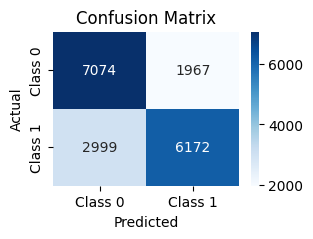

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, logreg_prediction)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##Model - KNN

In [ ]:
# Train the model k-Nearest Neighbors

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_predictions = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"\nk-Nearest Neighbors (KNN) Accuracy:{knn_accuracy:.2f}")
print("k-Nearest Neighbors (KNN) Classification Report:\n", classification_report(y_test, knn_predictions))


k-Nearest Neighbors (KNN) Accuracy:0.71
k-Nearest Neighbors (KNN) Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      9041
           1       0.72      0.70      0.71      9171

    accuracy                           0.71     18212
   macro avg       0.71      0.71      0.71     18212
weighted avg       0.71      0.71      0.71     18212



In [ ]:
knn_train_pred = knn_model.predict(x_train)
knn_train_accu = accuracy_score(y_train, knn_train_pred)
print(knn_train_accu)

0.8048813968811772


In [ ]:
cm=confusion_matrix(y_test,knn_predictions)
print("Confussion Matrix")
print(cm)

Confussion Matrix
[[6524 2517]
 [2714 6457]]


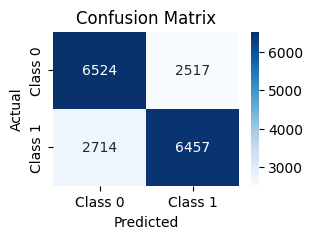

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, knn_predictions)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

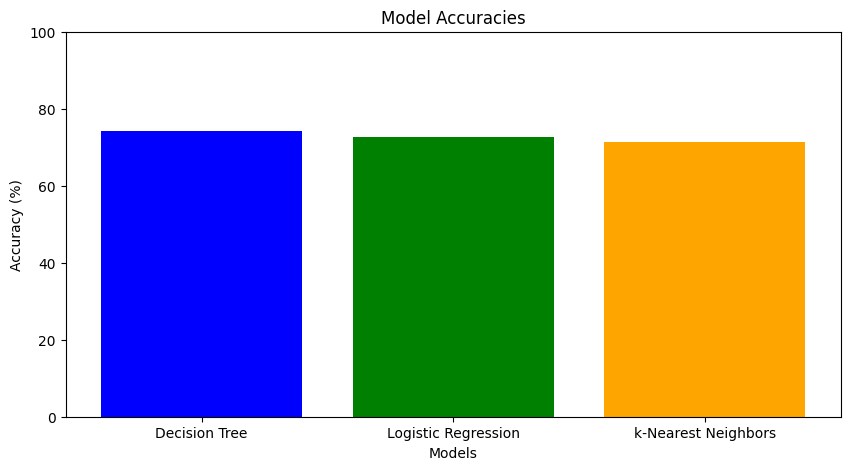

In [ ]:

# Convert accuracies to percentage
dcl_accuracy_percentage = DecisionTree_accuracy * 100
logreg_accuracy_percentage = acc_log * 100
knn_accuracy_percentage = knn_accuracy * 100

# Create a bar chart
models = ['Decision Tree', 'Logistic Regression', 'k-Nearest Neighbors']
accuracies = [dcl_accuracy_percentage, logreg_accuracy_percentage, knn_accuracy_percentage]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100 for percentage
plt.show()



In [ ]:
import joblib

In [ ]:
model=dcl
joblib.dump(model,"decision_tree_pretrained.pkl")

['decision_tree_pretrained.pkl']

In [ ]:
from google.colab import files
files.download("decision_tree_pretrained.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>